<a href="https://colab.research.google.com/github/Harshkotkar/Deep-Learning/blob/main/Graduate_admissions_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mukeshmanral_graduates_admission_prediction_path = kagglehub.dataset_download('mukeshmanral/graduates-admission-prediction')

print('Data source import complete.')


Data source import complete.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")


In [22]:
path="/kaggle/input/graduates-admission-prediction/admission_data.csv"
df=pd.read_csv(path)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
df.shape

(500, 8)

In [24]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [25]:
x = df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [43]:
print(x_train.shape)
print(y_train.shape)

(350, 7)
(350,)


In [79]:
model=models.Sequential([
    Dense(7,activation="relu",input_dim=7),
    Dense(32,activation='relu'),
    Dense(7,activation='relu'),
    Dense(1,activation='linear')
])

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanAbsoluteError])


In [82]:
early_stoping=EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [83]:
history=model.fit(x_train,y_train,
                  epochs=100,
                  batch_size=32,
                  callbacks=early_stoping,
                  validation_data=(x_test,y_test))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.8681 - mean_absolute_error: 0.8971 - val_loss: 0.6379 - val_mean_absolute_error: 0.7630
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5986 - mean_absolute_error: 0.7378 - val_loss: 0.4683 - val_mean_absolute_error: 0.6396
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4406 - mean_absolute_error: 0.6224 - val_loss: 0.3510 - val_mean_absolute_error: 0.5397
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3160 - mean_absolute_error: 0.5139 - val_loss: 0.2597 - val_mean_absolute_error: 0.4571
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2283 - mean_absolute_error: 0.4283 - val_loss: 0.1939 - val_mean_absolute_error: 0.3946
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1767 - mean_absolute_error: 0.3762 - val_loss: 0.1391 - val_mean_absolute_error: 0.3309
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1198 - mean_absolute_error: 0.3047 - val

In [84]:
y_pred=model.predict(x_test)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8101387906363228

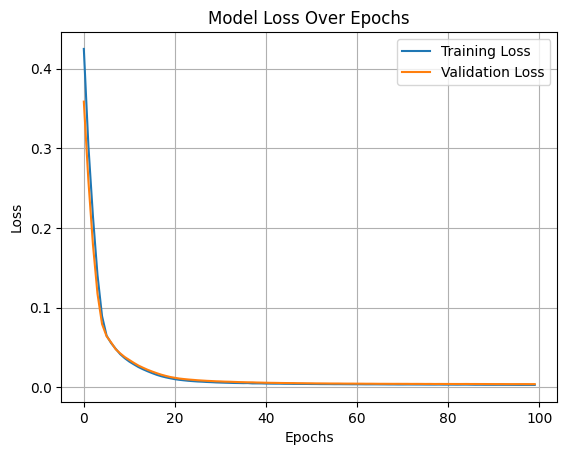

In [52]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


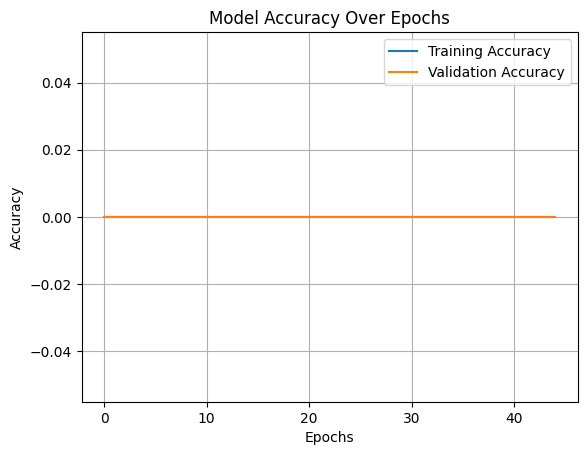

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
